In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)

print(city_data.columns)

ride_data = pd.read_csv(ride_data_to_load)

print(ride_data.columns)


# # Combine the data into a single dataset

merged_df = city_data.merge(ride_data, on = 'city')


# # Display the data table for preview


merged_df.head()



Index(['city', 'driver_count', 'type'], dtype='object')
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
merged_df1 = merged_df[['city','date','fare','ride_id','driver_count','type']]
merged_df1.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

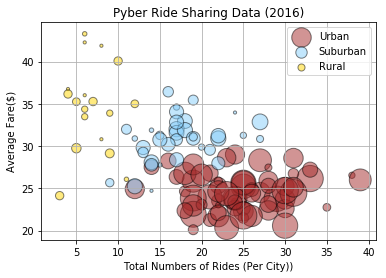

In [3]:
# Obtain the x and y coordinates for each of the three city types

urban_city = merged_df1.loc[(merged_df1['type'] == 'Urban')]
suburban_city = merged_df1.loc[(merged_df1["type"] == "Suburban")]
rural_city = merged_df1.loc[(merged_df1["type"] == "Rural")]


avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].mean()


avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].mean()

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].mean()


plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="brown", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")


plt.grid()

plt.title("Pyber Ride Sharing Data (2016)")
# x label
plt.xlabel("Total Numbers of Rides (Per City))")
# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')




# Save Figure

plt.savefig("Pyber Ride Sharing Data (2016).png")


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

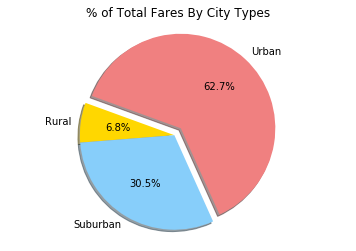

In [5]:
# Calculate Type Percents

total_fare = merged_df.groupby(['type'])['fare'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Fares By City Types.png")


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

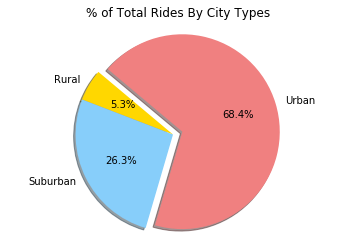

In [7]:
# Calculate Ride Percents

total_rides = merged_df.groupby(['type'])['ride_id'].count()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("% of Total Rides By City Types.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

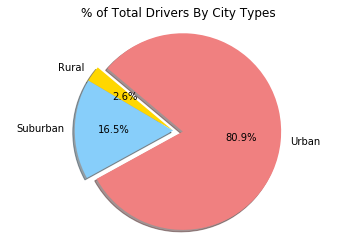

In [9]:
# Calculate Driver Percents

total_drivers = city_data.groupby(['type'])['driver_count'].sum()
# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


# Save Figure
plt.savefig("% of Total Drivers By City Types.png")

In [10]:
# Show Figure
plt.show()